In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv("Combined_Data_For_Analysis.csv")

In [4]:
df.head()

,state_name,district_name,market_center_name,Variety,group_name,Arrival,MIN,MAX,MODAL,date_arrival
0,Maharashtra,Nashik,Chandvad,Red,Vegetables,1505,1200,3025,2850,29-Dec-17
1,Maharashtra,Nashik,Chandvad,Red,Vegetables,1200,1700,2976,2800,28-Dec-17
2,Maharashtra,Nashik,Chandvad,Red,Vegetables,1912,1500,3000,2850,27-Dec-17
3,Maharashtra,Nashik,Chandvad,Red,Vegetables,800,1300,2750,2490,22-Dec-17
4,Maharashtra,Nashik,Chandvad,Red,Vegetables,1588,1400,2850,2670,21-Dec-17


In [6]:
#Missing Value 
df.isna().sum()

state_name            0
district_name         0
market_center_name    0
Variety               0
group_name            0
Arrival               0
MIN                   0
MAX                   0
MODAL                 0
date_arrival          0
dtype: int64

In [7]:
df.describe()

,Arrival,MIN,MAX,MODAL
count,60256.000000,60256.000000,60256.000000,60256.000000
mean,742.094148,683.938678,2030.942197,1663.062052
std,762.459786,640.509059,1572.200630,1276.573816
min,1.000000,20.000000,60.000000,50.000000
25%,187.000000,300.000000,892.000000,701.000000
50%,502.000000,500.000000,1621.000000,1350.000000
75%,1047.000000,931.000000,2750.000000,2300.000000
max,6485.000000,12555.000000,31825.000000,13500.000000


In [8]:
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.values
print(numeric_features)
category_features = df.select_dtypes(include=['object', 'bool']).columns.values
#category_features = category_features[category_features != 'y']
print(category_features)

['Arrival' 'MIN' 'MAX' 'MODAL']
['state_name' 'district_name' 'market_center_name' 'Variety' 'group_name'
 'date_arrival']


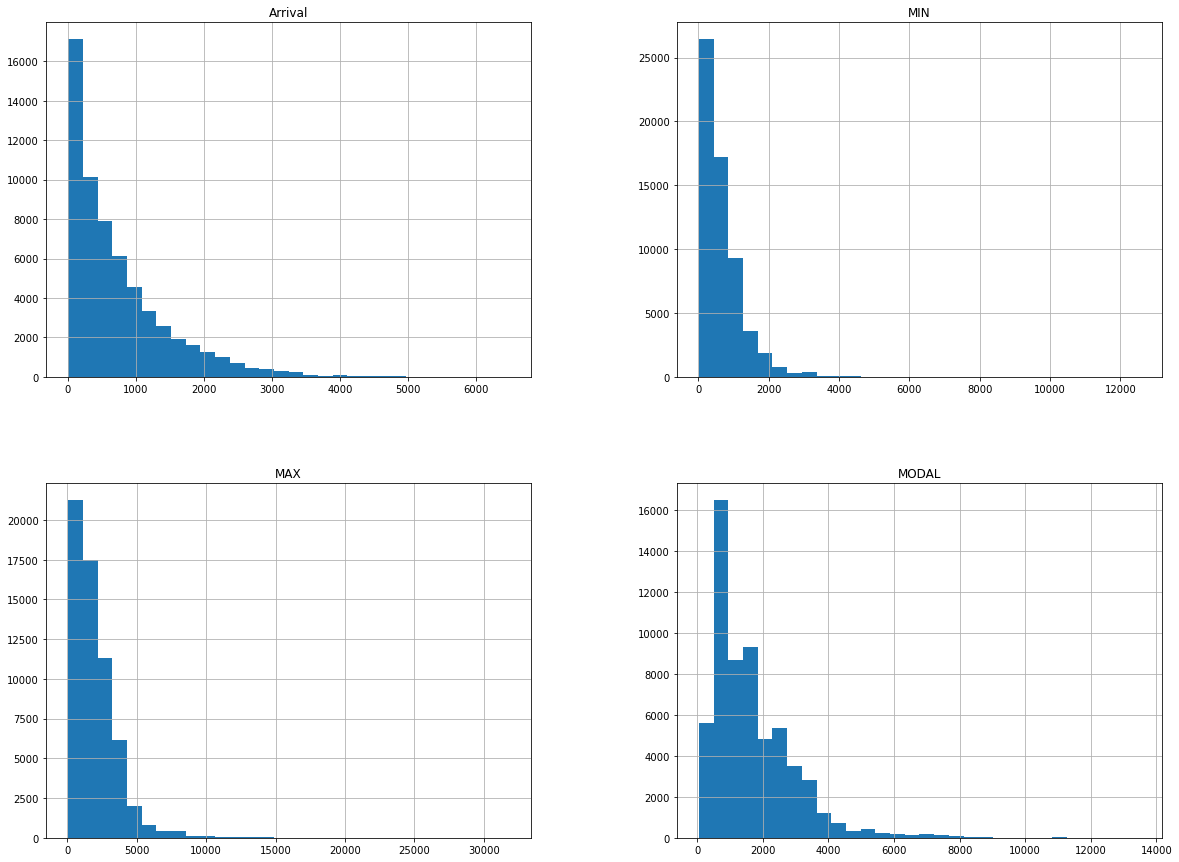

In [11]:
df[['Arrival','MIN','MAX','MODAL']].hist(bins=30, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [16]:
data_wide = df.pivot(columns = 'Arrival',
                     values = 'Variety')
data_wide.head()

Arrival,1,2,3,4,5,6,7,8,9,10,...,5700,5755,5900,5913,5979,6025,6166,6269,6390,6485
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


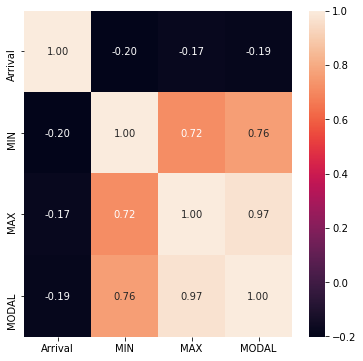

In [17]:
fig, ax = plt.subplots(figsize=(6,6))  
sns.heatmap(df.corr(),annot=True, fmt='.2f')
plt.show()

In [19]:
##Print unique value for each column 
category_features = df.select_dtypes(include=['object', 'bool']).columns.values
for col in category_features:
    print(col, "(", len(df[col].unique()) , "values):\n", np.sort(df[col].unique()))

state_name ( 1 values):
 ['Maharashtra']
district_name ( 1 values):
 ['Nashik']
market_center_name ( 20 values):
 ['Chandvad' 'Devala' 'Dindori' 'Dindori(Vani)' 'Kalvan' 'Lasalgaon'
 'Lasalgaon(Niphad)' 'Lasalgaon(Vinchur)' 'Malegaon' 'Malegaon(Umarane)'
 'Manmad' 'Nampur' 'Nandgaon' 'Nasik' 'Pimpalgaon'
 'Pimpalgaon Baswant(Saykheda)' 'Satana' 'Sinner' 'Umrane' 'Yeola']
Variety ( 4 values):
 ['Other' 'Pole' 'Red' 'White']
group_name ( 1 values):
 ['Vegetables']
date_arrival ( 1518 values):
 ['01-Apr-17' '01-Apr-18' '01-Apr-19' ... '31-Oct-18' '31-Oct-19'
 '31-Oct-20']


In [20]:
for col in category_features:
    print(f"{col} \n{20 * '-'}")    
    print(df[col].value_counts(), "\n")
    
print(df.nunique(axis=1))

state_name 
--------------------
Maharashtra    60256
Name: state_name, dtype: int64 

district_name 
--------------------
Nashik    60256
Name: district_name, dtype: int64 

market_center_name 
--------------------
Pimpalgaon                      5112
Lasalgaon                       4521
Manmad                          4464
Lasalgaon(Niphad)               4089
Nasik                           4029
Devala                          3903
Dindori(Vani)                   3771
Chandvad                        3716
Pimpalgaon Baswant(Saykheda)    3594
Yeola                           3443
Sinner                          3270
Kalvan                          3171
Satana                          2892
Nandgaon                        2640
Malegaon(Umarane)               2040
Dindori                         1443
Lasalgaon(Vinchur)              1431
Umrane                          1050
Nampur                           849
Malegaon                         828
Name: market_center_name, dtype: int64 

Var